In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'

df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5
data['x6']=data['x']**6
data['x7']=data['x']**7
data['x8']=data['x']**8

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:10].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5,x6,x7,x8
159,1.427749,1.0,-0.861666,0.742468,-0.639760,0.551259,-4.750013e-01,4.092925e-01,-3.526734e-01,3.038867e-01
4,-1.335228,1.0,-0.152690,0.023314,-0.003560,0.000544,-8.299629e-05,1.267274e-05,-1.935005e-06,2.954567e-07
28,0.538102,1.0,0.043697,0.001909,0.000083,0.000004,1.593090e-07,6.961270e-09,3.041841e-10,1.329183e-11
56,0.802068,1.0,0.306217,0.093769,0.028714,0.008793,2.692427e-03,8.244661e-04,2.524653e-04,7.730906e-05
139,-0.646465,1.0,-0.137163,0.018814,-0.002581,0.000354,-4.854974e-05,6.659234e-06,-9.134014e-07,1.252850e-07


In [3]:
def cost_function_MAE(X, Y, theta):
    m = len(Y)
    J = np.sum(abs(X.dot(theta)-Y))/(2 * m)
    return J

In [4]:
def gradient_descent(X, Y , Theta , alpha , iterations , xTest , yTest  ):
    cost_history = [0] * iterations
    test_cost_history = [0] * iterations
    step_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
 # Hypothesis Values
        h = X.dot(Theta)
    
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
    
 # Gradient Calculation
    
        judge = loss / abs(loss)
        
        gradient = X.T.dot(judge) / (2*m)
    
 # Changing Values of B using Gradient
        Theta = Theta - alpha * gradient
        alpha = alpha - 0.000001
    
 # New Cost Value
        cost = cost_function_MAE(X, Y, Theta)
        cost_history[iteration] = cost
        test_cost_history[iteration] = cost_function_MAE(xTest, yTest, Theta)
        step_history[iteration] = alpha * gradient
        
    return Theta, cost_history , test_cost_history , step_history

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m: , 1]
xTest = X[m:]
y_test = y[m:]

In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

alpha = 0.9
iter_ = 5000

newTheta, cost_history , test_cost_history , step_history = gradient_descent(X_train, y_train, Theta, alpha, iter_ , xTest , y_test )

print(newTheta)

[-4.59793333e-03  3.98807892e+00  5.05627173e-01 -1.35171077e+01
  8.58519788e-01  2.55844581e+00  5.02806329e-01  6.61724164e+00
 -5.85239590e-01]


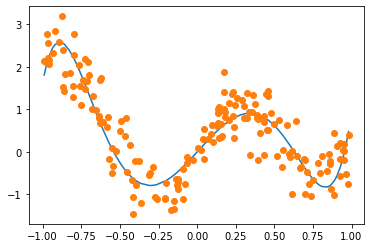

In [7]:
# plot
sorted_X_train = np.sort(mainX_train)
# sorted_X_train = mainX_train
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)+ newTheta[6]*(sorted_X_train[i]**6) + newTheta[7]*(sorted_X_train[i]**7) + newTheta[8]*(sorted_X_train[i]**8)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)+ Thetas[6]*(testData[i]**6) + Thetas[7]*(testData[i]**7) + Thetas[8]*(testData[i]**8)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [10]:
y_ = pred(X_test,newTheta)

In [11]:
r2(y_,y_test)

0.802292919646579

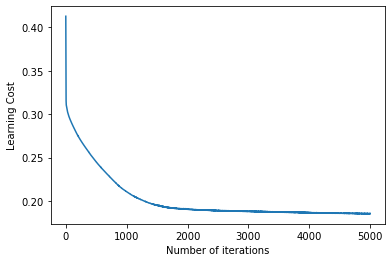

In [12]:
# Plot the convergence graph for learning cost
plt.plot(np.arange(iter_), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Learning Cost')
plt.show()

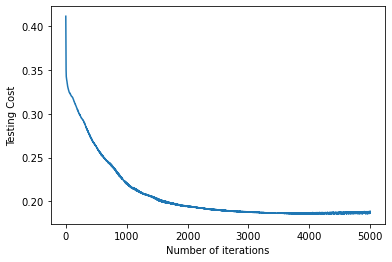

In [13]:
# Plot the convergence graph for testing cost
plt.plot(np.arange(iter_), test_cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Testing Cost')
plt.show()

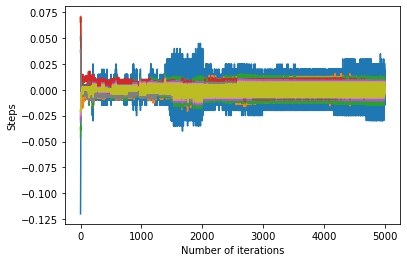

In [14]:
# Plot the convergence graph for thetas Step
plt.plot(np.arange(iter_), step_history)
plt.xlabel('Number of iterations')
plt.ylabel('Steps')
plt.show()